<a href="https://colab.research.google.com/github/fhzh123/cau_bu/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Nerual Networks (CNNS)
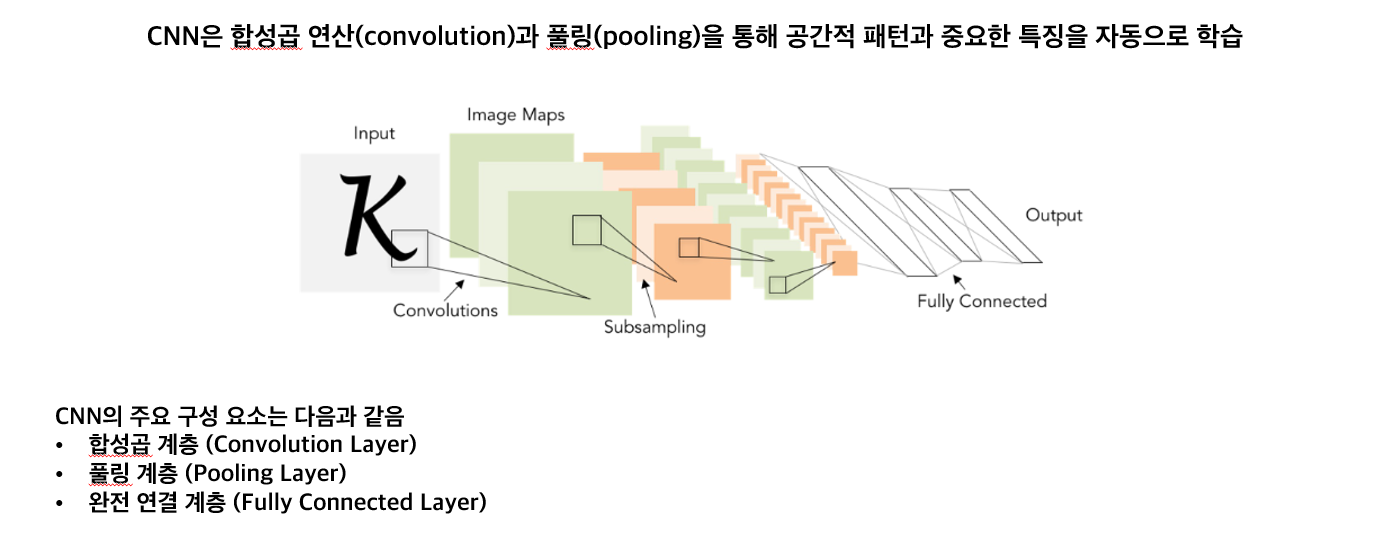

### Convolutional Layer
•입력 이미지와 필터(커널)를 사용해 특징 맵(feature map)을 생성합니다.

•필터는 일정한 크기의 작은 행렬로, 이미지 위를 슬라이딩하면서 픽셀 값을 곱하고 더한 결과를 출력합니다.

•이 과정을 통해 엣지, 색상, 텍스처 등 다양한
 저수준 특징을 추출합니다.

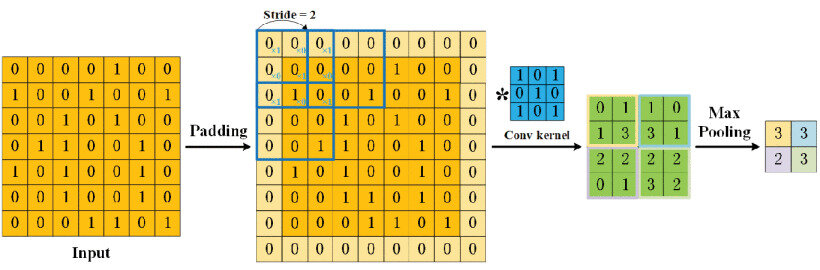
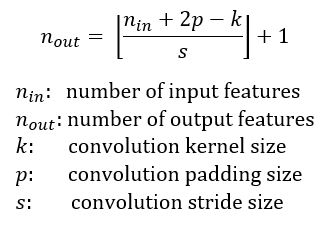

In [1]:
import numpy as np

In [2]:
def conv2d(input, kernel, stride=1, padding=0):
    # 입력에 패딩 추가
    input_padded = np.pad(input, ((padding, padding), (padding, padding)), mode='constant')

    # 출력 크기 계산
    output_height = (input.shape[0] - kernel.shape[0] + 2 * padding) // stride + 1
    output_width = (input.shape[1] - kernel.shape[1] + 2 * padding) // stride + 1
    output = np.zeros((output_height, output_width))

    # 합성곱 연산
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = input_padded[i*stride:i*stride + kernel.shape[0], j*stride:j*stride + kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)

    return output

# 테스트
input_image = np.random.rand(5, 5)  # 5x5 입력 이미지
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # 간단한 엣지 필터
output = conv2d(input_image, kernel, stride=1, padding=1)
print(output)


[[-1.1198701  -0.73646569  0.5616459   1.39113383  0.5582242 ]
 [-1.23862576 -1.51125961  0.60948747  1.5643244   0.62913829]
 [-0.96528941 -0.13490352  0.71258664  0.89367844  0.25270277]
 [-1.4563542  -0.77294795  0.51973705  0.64765592  0.93661715]
 [-1.33759854  0.00184597  0.47189548  0.47446535  0.86570306]]


In [3]:
import torch
import torch.nn as nn

# 입력 이미지 (1 x 3 x 32 x 32 크기의 텐서: Batch, Channel, Height, Width)
x = torch.rand(1, 3, 32, 32)  # 예: RGB 이미지

# 합성곱 계층 정의 (3채널 입력, 16개 필터, 커널 크기 3x3)
conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)

# 합성곱 연산 실행
out = conv(x)
print(out.shape)  # 출력 텐서 크기: [1, 16, 32, 32]

torch.Size([1, 16, 32, 32])


Linear Layer와의 비교

In [4]:
import torch
import torch.nn as nn

# 1. Linear Layer 정의 (입력 차원: 4, 출력 차원: 2)
linear = nn.Linear(in_features=4, out_features=2, bias=True)

# 2. 랜덤 입력 텐서 생성 (배치 크기: 3, 입력 차원: 4)
x = torch.rand(3, 4)  # 예: 배치 크기 3인 입력 데이터

# 3. 순전파 실행 (Linear Layer 통과)
output = linear(x)

print("입력:", x.shape)
print("출력:", output.shape)
print("가중치:", linear.weight)
print("편향:", linear.bias)

입력: torch.Size([3, 4])
출력: torch.Size([3, 2])
가중치: Parameter containing:
tensor([[ 0.4015,  0.1270, -0.4494, -0.2049],
        [-0.2567, -0.2789,  0.0492,  0.0720]], requires_grad=True)
편향: Parameter containing:
tensor([-0.1301, -0.3787], requires_grad=True)


### Pooling Layer

Pooling Layer(풀링 계층)는 **CNN(Convolutional Neural Network)**에서 특징 맵(feature map)의 크기를 줄이고, 중요한 정보만 남기기 위해 사용되는 계층입니다. 이 과정은 연산량을 줄이고, 모델이 과적합되지 않도록 돕습니다.

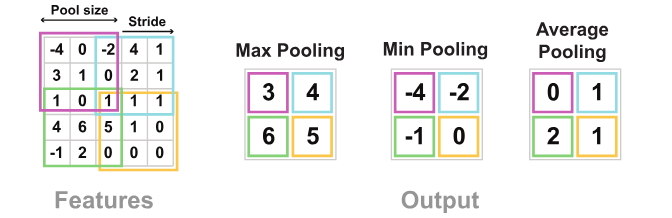

**Max Pooling Layer**
필터 내에서 가장 큰 값을 선택하는 맥스 풀링을 구현합니다.
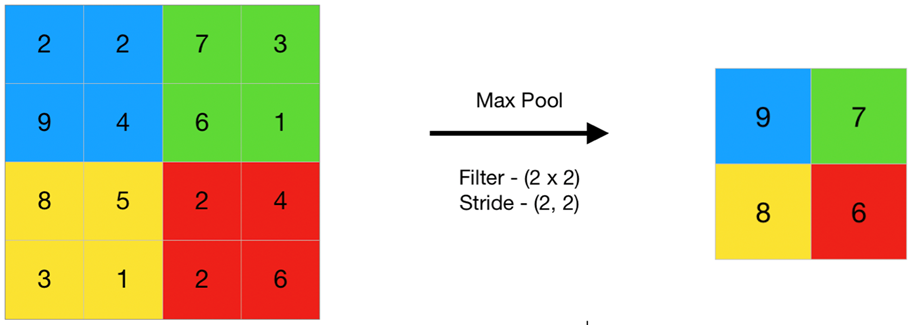

In [5]:
def max_pool2d(input, size=2, stride=2):
    output_height = (input.shape[0] - size) // stride + 1
    output_width = (input.shape[1] - size) // stride + 1
    output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            region = input[i*stride:i*stride + size, j*stride:j*stride + size]
            output[i, j] = np.max(region)

    return output

# 테스트
input_image = np.random.rand(4, 4)  # 4x4 입력 이미지
output = max_pool2d(input_image, size=2, stride=2)
print(input_image)
print('==============================')
print(output)

[[0.43617116 0.2754166  0.11165764 0.69941164]
 [0.91329958 0.18324267 0.50120486 0.75853711]
 [0.3277345  0.61658315 0.18044624 0.73568605]
 [0.37311289 0.53857043 0.81766637 0.47937251]]
[[0.91329958 0.75853711]
 [0.61658315 0.81766637]]


**Min Pooling Layer** 필터 내에서 가장 작은 값을 선택하는 민 풀링을 구현합니다
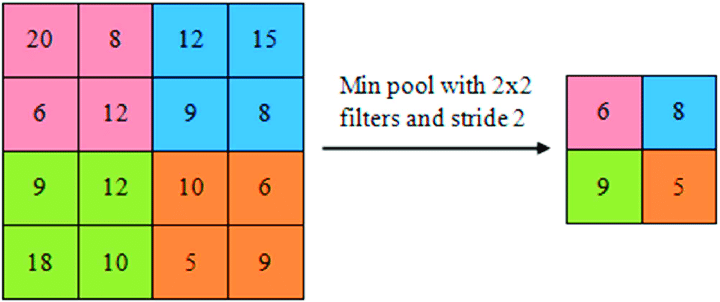

In [6]:
def min_pool2d(input, size=2, stride=2):
    output_height = (input.shape[0] - size) // stride + 1
    output_width = (input.shape[1] - size) // stride + 1
    output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            region = input[i*stride:i*stride + size, j*stride:j*stride + size]
            output[i, j] = np.min(region)

    return output

# 테스트
input_image = np.random.rand(4, 4)  # 4x4 입력 이미지
output = min_pool2d(input_image, size=2, stride=2)
print(input_image)
print('==============================')
print(output)

[[0.93191992 0.75869957 0.716808   0.99932164]
 [0.61652716 0.38662631 0.01829038 0.62819446]
 [0.36186316 0.47635982 0.26649321 0.39548541]
 [0.38150877 0.03203448 0.5106427  0.62377397]]
[[0.38662631 0.01829038]
 [0.03203448 0.26649321]]


**Average Pooling** 필터 내 값들의 평균을 선택하는 평균 풀링을 구현합니다.
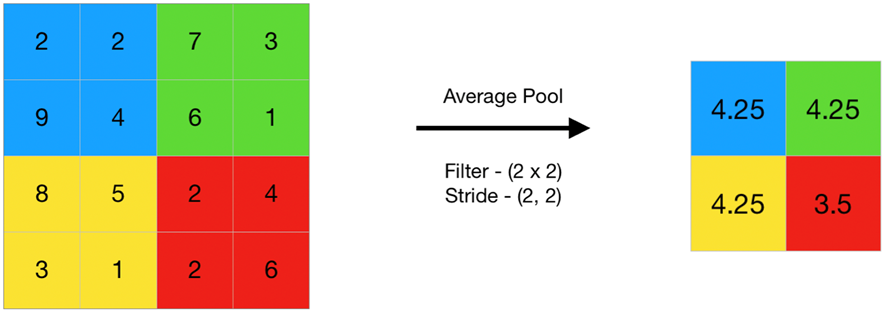


In [7]:
def avg_pool2d(input, size=2, stride=2):
    output_height = (input.shape[0] - size) // stride + 1
    output_width = (input.shape[1] - size) // stride + 1
    output = np.zeros((output_height, output_width))

    for i in range(0, output_height):
        for j in range(0, output_width):
            region = input[i*stride:i*stride + size, j*stride:j*stride + size]
            output[i, j] = np.mean(region)

    return output

# 테스트
input_image = np.random.rand(4, 4)  # 4x4 입력 이미지
output = avg_pool2d(input_image, size=2, stride=2)
print(input_image)
print('==============================')
print(output)

[[0.62484252 0.27112559 0.79224485 0.93617036]
 [0.2985114  0.97599297 0.0121657  0.27337854]
 [0.20494853 0.61791341 0.98214661 0.34208597]
 [0.43451873 0.03190339 0.38714561 0.85052408]]
[[0.54261812 0.50348986]
 [0.32232101 0.64047557]]


In [8]:
x = torch.rand(1, 3, 32, 32)  # 예: RGB 이미지

conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 2x2 맥스 풀링 정의

out = conv(x)
out_pool = pool(out)

print(out.shape)
print(out_pool.shape)  # 출력 텐서 크기: [1, 16, 16, 16]

torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])


### 완전 연결 계층 (Fully Connected Layer)
**Fully Connected Layer (완전 연결 계층)**는 신경망에서 모든 입력 뉴런이 모든 출력 뉴런과 연결된 계층입니다.   
주로 CNN(합성곱 신경망)의 마지막 단계에서 사용되어, 최종 분류 또는 예측을 수행합니다.

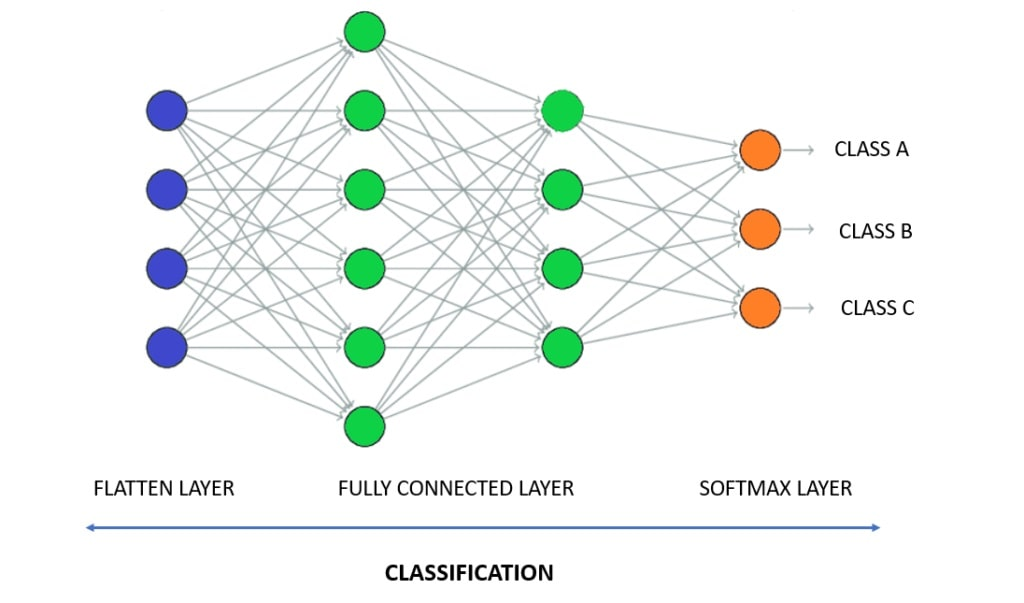

In [9]:
def fully_connected(x, weights, bias):
    return np.dot(x, weights) + bias

# 테스트
input_vector = np.array([1, 2, 3])  # 입력 벡터
weights = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])  # 가중치 행렬 (3x2)
bias = np.array([0.1, 0.2])  # 편향 벡터 (2차원)
output = fully_connected(input_vector, weights, bias)
print(input_vector.shape)
print(output.shape)

(3,)
(2,)


In [10]:
x = torch.rand(1, 3, 32, 32)  # 예: RGB 이미지

conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)  # 2x2 맥스 풀링 정의

out = conv(x)
out_pool = pool(out)

print(out.shape)
print(out_pool.shape)  # 출력 텐서 크기: [1, 16, 16, 16]

# 특징 맵을 Flatten (16x16x16 → 4096)하여 완전 연결 계층에 전달
out_flat = out_pool.view(out_pool.size(0), -1)  # Flatten
print(out_flat.shape)  # [1, 4096]

# 완전 연결 계층 정의 (4096 → 10, 10개의 클래스)
fc = nn.Linear(4096, 10)
out_fc = fc(out_flat)
print(out_fc.shape)
print(out_fc)  # [1, 10] (각 클래스에 대한 출력)

torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 16, 16])
torch.Size([1, 4096])
torch.Size([1, 10])
tensor([[ 0.0932, -0.1899,  0.3257, -0.2846, -0.1598, -0.1998,  0.2907,  0.0902,
          0.3768, -0.1965]], grad_fn=<AddmmBackward0>)


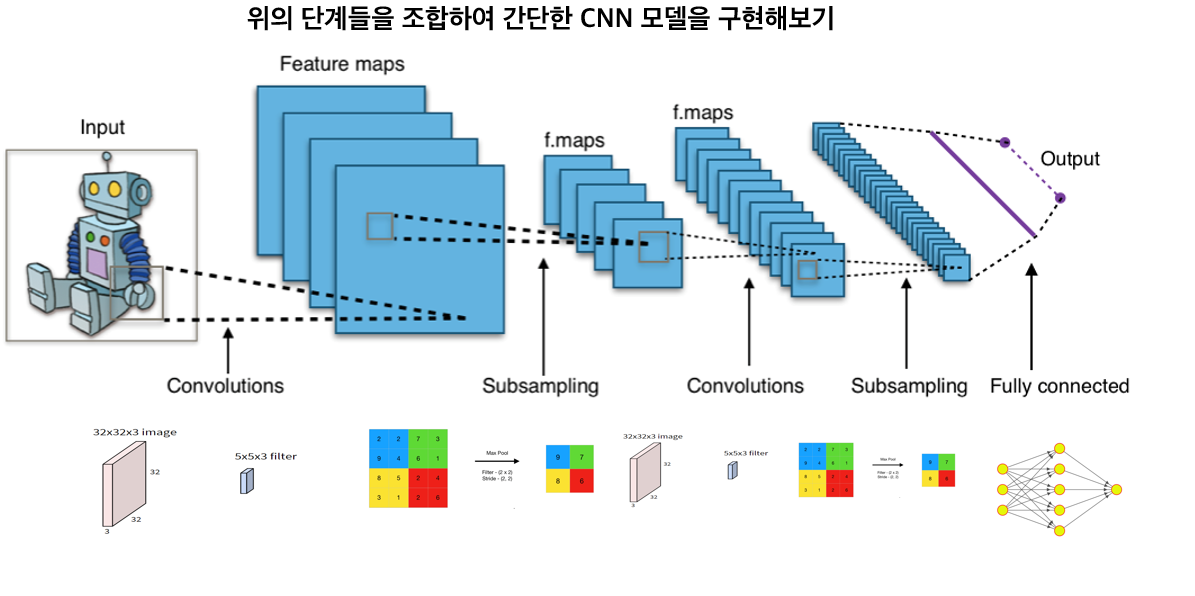

Step 1: 합성곱 계층 (Convolution Layer)  

Step 2: 활성화 함수 (ReLU)  

Step 3: 풀링 계층 (Max Pooling)  

Step 4: 완전 연결 계층 (Fully Connected Layer)  

In [11]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # CIFAR-10 크기 (32x32 입력 → 8x8 출력)
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN()

# 입력 예시 (Batch size: 4, 3채널, 32x32 이미지)
inputs = torch.rand(4, 3, 32, 32)

# 모델 실행 (순전파)
outputs = model(inputs)
print(outputs.shape)  # [4, 10]


torch.Size([4, 10])


In [12]:
class SimpleCNN_detail(nn.Module):
    def __init__(self):
        super(SimpleCNN_detail, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # CIFAR-10 크기 (32x32 입력 → 8x8 출력)
        self.fc2 = nn.Linear(128, 10)  # 10개의 클래스

    def forward(self, x):
        print('input shape : ', x.shape)
        x = self.conv1(x)
        print('conv output shape : ', x.shape)
        x = torch.relu(x)
        print('relu output shape : ', x.shape)
        x = self.pool(x)
        print('pooling output shape : ', x.shape)

        x = self.conv2(x)
        print('conv output shape : ', x.shape)
        x = torch.relu(x)
        print('relu output shape : ', x.shape)
        x = self.pool(x)
        print('pooling output shape : ', x.shape)
        x = x.view(-1, 32 * 8 * 8)  # Flatten
        print('flatten output shape', x.shape)
        x = self.fc1(x)
        print('fc output shape', x.shape)
        x = torch.relu(x)
        x = self.fc2(x)
        print('fc output shape', x.shape)
        return x

# 모델 초기화
model = SimpleCNN_detail()

# 입력 예시 (Batch size: 4, 3채널, 32x32 이미지)
inputs = torch.rand(4, 3, 32, 32)

# 모델 실행 (순전파)
outputs = model(inputs)
print(outputs.shape)  # [4, 10]



input shape :  torch.Size([4, 3, 32, 32])
conv output shape :  torch.Size([4, 16, 32, 32])
relu output shape :  torch.Size([4, 16, 32, 32])
pooling output shape :  torch.Size([4, 16, 16, 16])
conv output shape :  torch.Size([4, 32, 16, 16])
relu output shape :  torch.Size([4, 32, 16, 16])
pooling output shape :  torch.Size([4, 32, 8, 8])
flatten output shape torch.Size([4, 2048])
fc output shape torch.Size([4, 128])
fc output shape torch.Size([4, 10])
torch.Size([4, 10])


CIFAR-10 데이터셋을 사용하여 간단한 CNN 모델을 학습하는 PyTorch 코드

1. 라이브러리 임포트

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

2.데이터셋 로드 및 전처리

In [29]:
# CIFAR-10 데이터셋 전처리 (이미지를 텐서로 변환하고 정규화)
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 정규화 (평균=0.5, 표준편차=0.5)
])

# 훈련 및 테스트 데이터셋 로드
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# 클래스 이름 정의
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:03<00:00, 43.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


3. 간단한 CNN 모델 정의

In [33]:
# @title 기본 제목 텍스트
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 첫 번째 합성곱 층 (3채널 입력, 16채널 출력)
#         self.pool = nn.MaxPool2d(2, 2)  # 2x2 맥스 풀링
#         self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 두 번째 합성곱 층
#         self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 완전 연결 층 (Flatten 후)
#         self.fc2 = nn.Linear(64, 10)  # 최종 출력 층 (10개의 클래스)

#     def forward(self, x):
#         x = self.pool(torch.relu(self.conv1(x)))
#         x = self.pool(torch.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 8 * 8)  # Flatten
#         x = torch.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # 모델 초기화
# model = SimpleCNN().cuda()


import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 첫 번째 합성곱 층 (3채널 입력, 16채널 출력)
        self.bn1 = nn.BatchNorm2d(16)  # 첫 번째 Batch Normalization
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 맥스 풀링

        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 두 번째 합성곱 층
        self.bn2 = nn.BatchNorm2d(32)  # 두 번째 Batch Normalization

        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 완전 연결 층 (Flatten 후)
        self.bn3 = nn.BatchNorm1d(64)  # 완전 연결 층의 Batch Normalization

        self.fc2 = nn.Linear(64, 10)  # 최종 출력 층 (10개의 클래스)

    def forward(self, x):
        # Conv1 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))

        # Conv2 -> BatchNorm -> ReLU -> Pooling
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))

        # Flatten
        x = x.view(-1, 32 * 8 * 8)

        # FC1 -> BatchNorm -> ReLU
        x = torch.relu(self.bn3(self.fc1(x)))

        # Final Layer
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN().cuda()

# 모델 요약 출력
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


4. 손실 함수 및 옵티마이저 정의

In [34]:
criterion = nn.CrossEntropyLoss().cuda()  # 분류를 위한 손실 함수
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD 옵티마이저


5. 모델 학습

In [35]:
for epoch in range(5):  # 5번의 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data  # 입력과 정답 레이블
        inputs = inputs.cuda()
        labels = labels.cuda()

        # 옵티마이저 초기화
        optimizer.zero_grad()

        # 순전파 + 손실 계산 + 역전파 + 최적화
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 2.002
Epoch 1, Batch 200, Loss: 1.734
Epoch 1, Batch 300, Loss: 1.595
Epoch 1, Batch 400, Loss: 1.504
Epoch 1, Batch 500, Loss: 1.454
Epoch 1, Batch 600, Loss: 1.389
Epoch 1, Batch 700, Loss: 1.393
Epoch 1, Batch 800, Loss: 1.326
Epoch 1, Batch 900, Loss: 1.295
Epoch 1, Batch 1000, Loss: 1.240
Epoch 1, Batch 1100, Loss: 1.283
Epoch 1, Batch 1200, Loss: 1.229
Epoch 1, Batch 1300, Loss: 1.220
Epoch 1, Batch 1400, Loss: 1.211
Epoch 1, Batch 1500, Loss: 1.187
Epoch 2, Batch 100, Loss: 1.093
Epoch 2, Batch 200, Loss: 1.098
Epoch 2, Batch 300, Loss: 1.094
Epoch 2, Batch 400, Loss: 1.071
Epoch 2, Batch 500, Loss: 1.075
Epoch 2, Batch 600, Loss: 1.044
Epoch 2, Batch 700, Loss: 1.037
Epoch 2, Batch 800, Loss: 1.042
Epoch 2, Batch 900, Loss: 1.053
Epoch 2, Batch 1000, Loss: 1.037
Epoch 2, Batch 1100, Loss: 1.040
Epoch 2, Batch 1200, Loss: 1.025
Epoch 2, Batch 1300, Loss: 0.998
Epoch 2, Batch 1400, Loss: 1.029
Epoch 2, Batch 1500, Loss: 0.982
Epoch 3, Batch 100, Loss: 0.

6. 테스트 데이터셋 평가

In [ ]:
correct = 0
total = 0

# 평가 모드 전환 (Gradient 비활성화)
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')

Accuracy on the test dataset: 60.16%


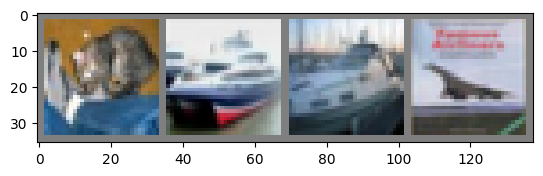

GroundTruth:  cat ship ship plane
Predicted:  dog car ship ship


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지 출력 함수 정의
def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


더 깊은 CNN 모델 구현해보기

In [ ]:
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()

        # 첫 번째 합성곱 블록
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # 두 번째 합성곱 블록
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        # 세 번째 합성곱 블록
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        # 완전 연결 계층
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

        # 드롭아웃 (과적합 방지)
        # self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 첫 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool1(x)

        # 두 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool2(x)

        # 세 번째 블록: Conv -> Conv -> MaxPool
        x = torch.relu(self.conv5(x))
        x = torch.relu(self.conv6(x))
        x = self.pool3(x)

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully Connected Layers
        x = torch.relu(self.fc1(x))
        # x = self.dropout(x)  # Dropout 적용
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = DeeperCNN().cuda()

손실 함수 및 옵티마이저 정의

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()  # 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저


모델 학습

In [ ]:
for epoch in range(10):  # 10 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()  # 옵티마이저 초기화
        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 최적화

        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 2.166
Epoch 1, Batch 200, Loss: 2.000
Epoch 1, Batch 300, Loss: 1.862
Epoch 1, Batch 400, Loss: 1.783
Epoch 1, Batch 500, Loss: 1.734
Epoch 1, Batch 600, Loss: 1.621
Epoch 1, Batch 700, Loss: 1.570
Epoch 1, Batch 800, Loss: 1.470
Epoch 1, Batch 900, Loss: 1.445
Epoch 1, Batch 1000, Loss: 1.378
Epoch 1, Batch 1100, Loss: 1.358
Epoch 1, Batch 1200, Loss: 1.332
Epoch 1, Batch 1300, Loss: 1.293
Epoch 1, Batch 1400, Loss: 1.233
Epoch 1, Batch 1500, Loss: 1.248
Epoch 2, Batch 100, Loss: 1.166
Epoch 2, Batch 200, Loss: 1.138
Epoch 2, Batch 300, Loss: 1.136
Epoch 2, Batch 400, Loss: 1.083
Epoch 2, Batch 500, Loss: 1.094
Epoch 2, Batch 600, Loss: 1.074
Epoch 2, Batch 700, Loss: 1.034
Epoch 2, Batch 800, Loss: 1.025
Epoch 2, Batch 900, Loss: 1.014
Epoch 2, Batch 1000, Loss: 0.994
Epoch 2, Batch 1100, Loss: 0.992
Epoch 2, Batch 1200, Loss: 0.996
Epoch 2, Batch 1300, Loss: 0.949
Epoch 2, Batch 1400, Loss: 0.937
Epoch 2, Batch 1500, Loss: 0.931
Epoch 3, Batch 100, Loss: 0.

테스트 데이터셋 평가

In [ ]:
correct = 0
total = 0
model.eval()  # 평가 모드 전환

with torch.no_grad():  # Gradient 계산 비활성화
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')


Accuracy on the test dataset: 76.18%


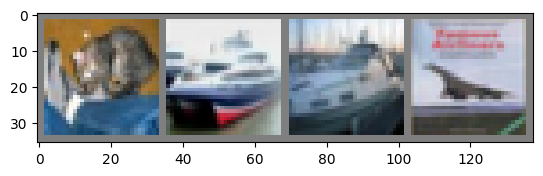

GroundTruth:  cat ship ship plane
Predicted:  dog ship ship plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
images = images.cuda()
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))


필터 개수와 뉴런 수를 증가한 CNN 코드

In [ ]:
import torch
import torch.nn as nn

class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()

        # 첫 번째 합성곱 블록: 필터 수 증가 (3채널 입력, 32채널 출력)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)

        # 두 번째 합성곱 블록: 더 많은 필터 (32채널 입력, 64채널 출력)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)

        # 세 번째 합성곱 블록 추가 (64채널 입력, 128채널 출력)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # Max Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully Connected Layers: 더 많은 뉴런 사용 (Flatten 후)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # 뉴런 수 256개로 증가
        self.fc2 = nn.Linear(256, 128)  # 중간 계층 추가 (뉴런 수 128)
        self.fc3 = nn.Linear(128, 10)  # 최종 출력 (10개 클래스)

        # 드롭아웃 추가 (과적합 방지)
        # self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # 첫 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv1(x)))

        # 두 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv2(x)))

        # 세 번째 합성곱 블록
        x = self.pool(torch.relu(self.conv3(x)))

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully Connected Layers
        x = torch.relu(self.fc1(x))
        # x = self.dropout(x)  # Dropout 적용
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 초기화
model = EnhancedCNN().cuda()

# 모델 구조 출력
print(model)


EnhancedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


손실 함수 및 옵티마이저 정의

In [ ]:
import torch.optim as optim

# 손실 함수: CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# 옵티마이저: Adam (학습률 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

모델 학습

In [ ]:
for epoch in range(10):  # 10 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()  # 옵티마이저 초기화
        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 최적화

        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 2.069
Epoch 1, Batch 200, Loss: 1.760
Epoch 1, Batch 300, Loss: 1.630
Epoch 1, Batch 400, Loss: 1.538
Epoch 1, Batch 500, Loss: 1.465
Epoch 1, Batch 600, Loss: 1.397
Epoch 1, Batch 700, Loss: 1.341
Epoch 1, Batch 800, Loss: 1.316
Epoch 1, Batch 900, Loss: 1.315
Epoch 1, Batch 1000, Loss: 1.202
Epoch 1, Batch 1100, Loss: 1.177
Epoch 1, Batch 1200, Loss: 1.163
Epoch 1, Batch 1300, Loss: 1.093
Epoch 1, Batch 1400, Loss: 1.087
Epoch 1, Batch 1500, Loss: 1.104
Epoch 2, Batch 100, Loss: 1.017
Epoch 2, Batch 200, Loss: 0.952
Epoch 2, Batch 300, Loss: 1.008
Epoch 2, Batch 400, Loss: 0.942
Epoch 2, Batch 500, Loss: 0.956
Epoch 2, Batch 600, Loss: 0.906
Epoch 2, Batch 700, Loss: 0.910
Epoch 2, Batch 800, Loss: 0.954
Epoch 2, Batch 900, Loss: 0.918
Epoch 2, Batch 1000, Loss: 0.893
Epoch 2, Batch 1100, Loss: 0.895
Epoch 2, Batch 1200, Loss: 0.870
Epoch 2, Batch 1300, Loss: 0.888
Epoch 2, Batch 1400, Loss: 0.858
Epoch 2, Batch 1500, Loss: 0.896
Epoch 3, Batch 100, Loss: 0.

모델 평가

In [ ]:
correct = 0
total = 0
model.eval()  # 평가 모드 전환

with torch.no_grad():  # Gradient 계산 비활성화
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')


Accuracy on the test dataset: 74.41%


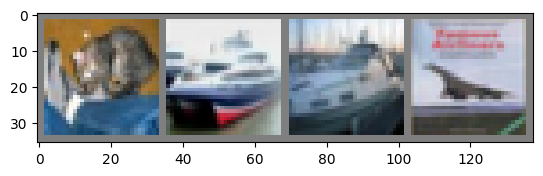

GroundTruth:  cat ship ship plane
Predicted:  cat car plane plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # 정규화 해제
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터에서 몇 개의 이미지 출력 및 예측
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images[:4]))  # 4개 이미지 출력
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]}' for j in range(4)))

# 예측 결과 출력
images = images.cuda()
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
